## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import Dropout
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2, normalize=False):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            if normalize:
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            if normalize:
                x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 20
BATCH_SIZES = [32, 256]
DROPOUT_EXPS = [0.4, 0.2]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
def get_tag(dropout, batch_size, normalize=False):
    if normalize:
        return 'dropout_%.1f,batchSize_%d,batch_normalize' % (dropout, batch_size)
    return 'dropout_%.1f,batchSize_%d' % (dropout, batch_size)

def fit(batch_size, dropout, normalize):
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout, normalize=normalize)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = get_tag(dropout, batch_size, normalize)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


for dropout in DROPOUT_EXPS:
    for batch_size in BATCH_SIZES:
        fit(batch_size, dropout, False)
        
for dropout in DROPOUT_EXPS:
    for batch_size in BATCH_SIZES:
        fit(batch_size, dropout, True)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0   

50000/50000 [==============================] - 10s 190us/step - loss: 1.8021 - accuracy: 0.3391 - val_loss: 1.7697 - val_accuracy: 0.3789
Epoch 17/20
50000/50000 [==============================] - 10s 192us/step - loss: 1.8001 - accuracy: 0.3426 - val_loss: 1.7494 - val_accuracy: 0.3898
Epoch 18/20
50000/50000 [==============================] - 10s 192us/step - loss: 1.7957 - accuracy: 0.3431 - val_loss: 1.7397 - val_accuracy: 0.3915
Epoch 19/20
50000/50000 [==============================] - 9s 189us/step - loss: 1.7901 - accuracy: 0.3454 - val_loss: 1.7412 - val_accuracy: 0.3998
Epoch 20/20
50000/50000 [==============================] - 10s 192us/step - loss: 1.7902 - accuracy: 0.3468 - val_loss: 1.7614 - val_accuracy: 0.3758
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
________________________________________________

50000/50000 [==============================] - 9s 190us/step - loss: 1.6045 - accuracy: 0.4235 - val_loss: 1.5253 - val_accuracy: 0.4524
Epoch 12/20
50000/50000 [==============================] - 10s 191us/step - loss: 1.5860 - accuracy: 0.4283 - val_loss: 1.5211 - val_accuracy: 0.4588
Epoch 13/20
50000/50000 [==============================] - 10s 192us/step - loss: 1.5834 - accuracy: 0.4293 - val_loss: 1.5091 - val_accuracy: 0.4671
Epoch 14/20
50000/50000 [==============================] - 9s 190us/step - loss: 1.5779 - accuracy: 0.4303 - val_loss: 1.5191 - val_accuracy: 0.4641
Epoch 15/20
50000/50000 [==============================] - 9s 190us/step - loss: 1.5620 - accuracy: 0.4374 - val_loss: 1.4930 - val_accuracy: 0.4714
Epoch 16/20
50000/50000 [==============================] - 10s 191us/step - loss: 1.5531 - accuracy: 0.4392 - val_loss: 1.4881 - val_accuracy: 0.4694
Epoch 17/20
50000/50000 [==============================] - 10s 190us/step - loss: 1.5468 - accuracy: 0.4431 - val_l

50000/50000 [==============================] - 16s 316us/step - loss: 2.2472 - accuracy: 0.2220 - val_loss: 1.8616 - val_accuracy: 0.3350
Epoch 2/20
50000/50000 [==============================] - 13s 263us/step - loss: 1.9144 - accuracy: 0.3027 - val_loss: 1.9785 - val_accuracy: 0.2865
Epoch 3/20
50000/50000 [==============================] - 13s 263us/step - loss: 1.8325 - accuracy: 0.3350 - val_loss: 1.7270 - val_accuracy: 0.3670
Epoch 4/20
50000/50000 [==============================] - 13s 261us/step - loss: 1.7921 - accuracy: 0.3517 - val_loss: 1.6719 - val_accuracy: 0.4066
Epoch 5/20
50000/50000 [==============================] - 13s 260us/step - loss: 1.7677 - accuracy: 0.3612 - val_loss: 1.6816 - val_accuracy: 0.3951
Epoch 6/20
50000/50000 [==============================] - 13s 262us/step - loss: 1.7643 - accuracy: 0.3628 - val_loss: 1.7305 - val_accuracy: 0.3866
Epoch 7/20
50000/50000 [==============================] - 13s 260us/step - loss: 1.7401 - accuracy: 0.3712 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 315us/step - loss: 2.0298 - accuracy: 0.2893 - val_loss: 1.7448 - val_accuracy: 0.3654
Epoch 2/20
50000/50000 [==============================] - 13s 261us/step - loss: 1.7633 - accuracy: 0.3635 - val_loss: 1.8940 - val_accuracy: 0.3261
Epoch 3/20
50000/50000 [==============================] - 13s 259us/step - loss: 1.6933 - accuracy: 0.3915 - val_loss: 1.7214 - val_accuracy: 0.3809
Epoch 4/20
50000/50000 [==============================] - 13s 259us/step - loss: 1.6522 - accuracy: 0.4095 - val_loss: 1.6388 - val_accuracy: 0.3989
Epoch 5/20
50000/50000 [==============================] - 13s 260us/step - loss: 1.6187 - accuracy: 0.4198 - val_loss: 1.7036 - val_accuracy: 0.3909
Epoch 6/20
50000/50000 [==============================] - 13s 260us/step - loss: 1.6055 - accuracy: 0.4249 - val_loss: 1.5902 - val_accuracy: 0.4338
Epoch 7/20
50000/50000 [==============================] 

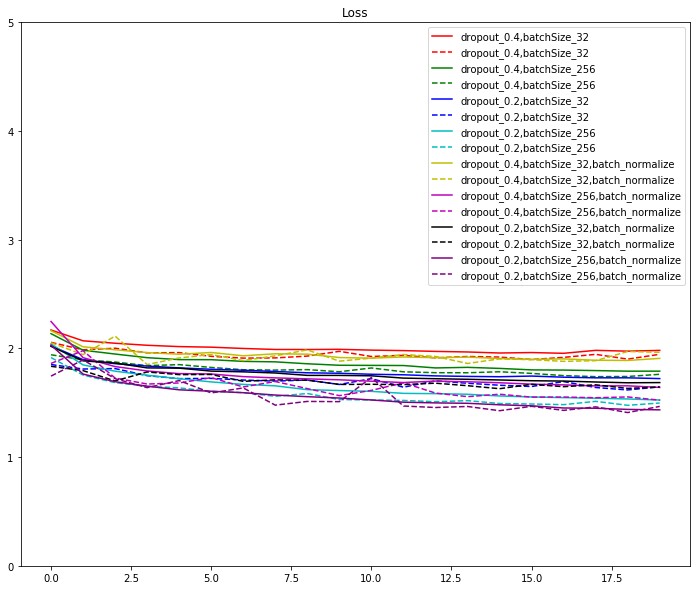

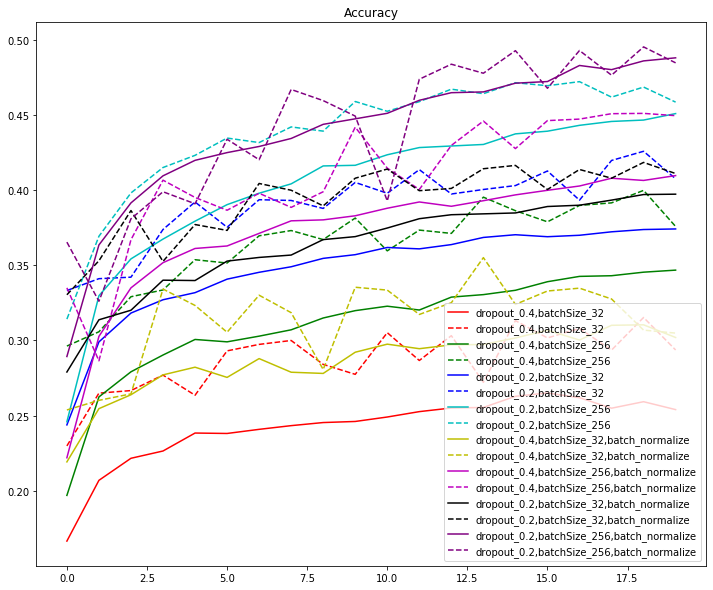

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "c", "y", "m", "k", "purple"]

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()